<a href="https://colab.research.google.com/github/MasterEllis/ML/blob/main/%D0%9E%D1%82%D1%82%D0%BE%D0%BA%D0%BE%D0%B2%D1%8B%D0%B5_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Решение задачи поиска оттоковых клиентов

* Загрузка данных и их анализ
* Обучение и оценка качества модели
  + обучение модели
  + оценка качества модели
* Интерпретация результатов модели
* Сохранение результатов

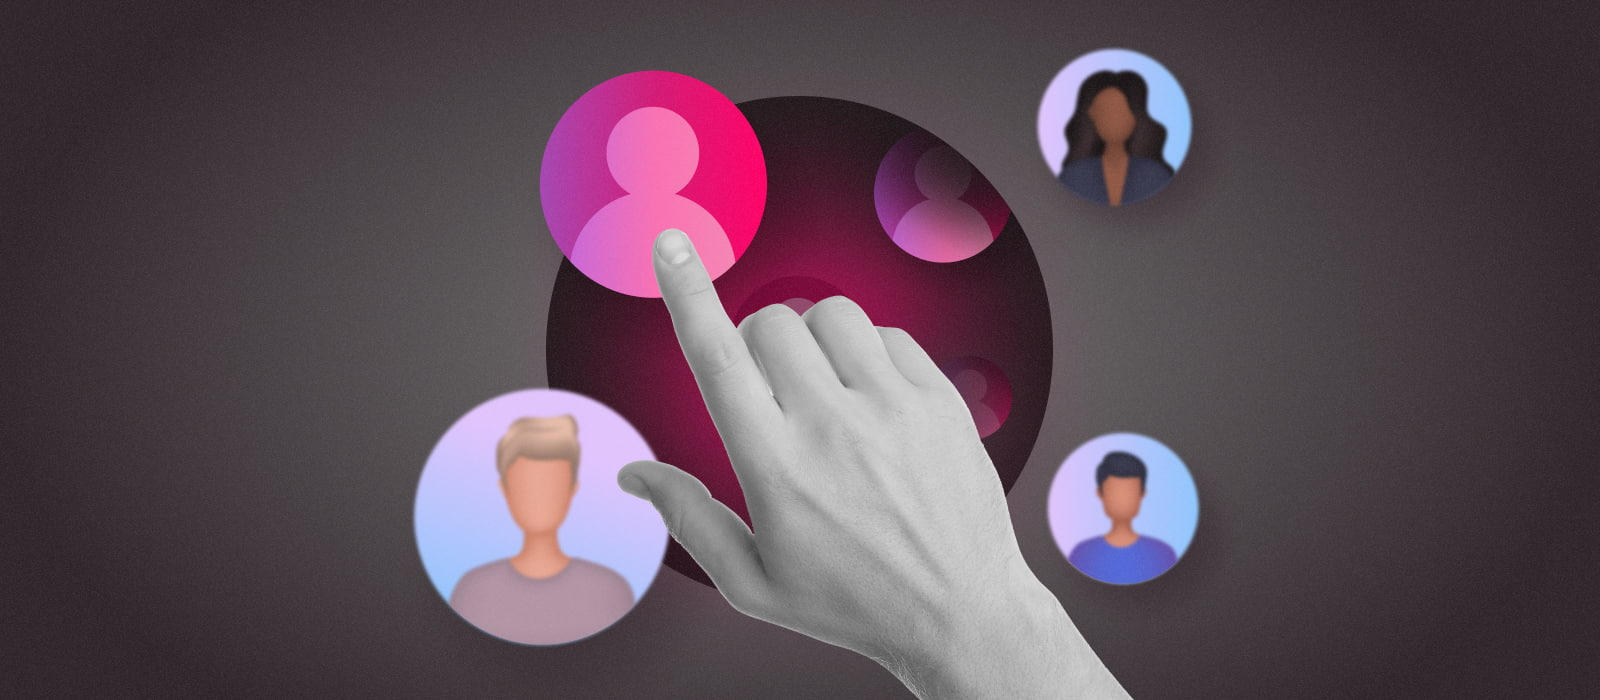

Мы будем пользоваться следующими библиотеками Python:

*   Pandas - библиотеки для работы с таблицами
*   Numpy - библиотеки для быстрых и эффективных вычислений
*   Matplotlib - для визуализации данных
*   Sklearn - библиотеки с основными инструментами ML

С функционалом этих библиотек разберемся в процессе обучения.

Будем решать задачу определения оттоковых клиентов,  а именно, *по характеристикам клиентов некоторого мобильного оператора будем определять, собираются ли клиенты сменить оператора или нет*.

## <font color='green'>1. Загрузка данных и их первичный анализ</font>

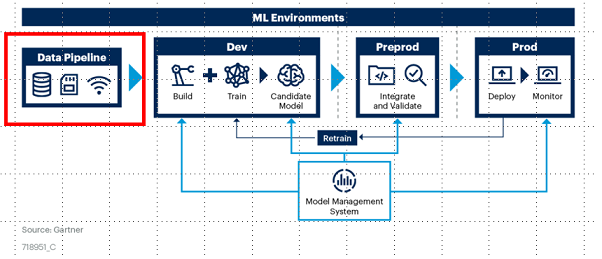

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/MasterEllis/datasets/refs/heads/main/churn_cliens_demo.csv")
data.head()

Посмотрим на данные.

Описание данных клиентов:
* state, string. Двухбуквенный код штата США, в котором проживает клиент
* account_length, numerical. Количество месяцев, в течение которых клиент работал с текущим оператором связи
* area_code, string="area_code_AAA" where AAA = 3-значный код города.
* international_plan, (yes/no). У клиента есть международный тарифный план.
* voice_mail_plan, (yes/no). У клиента есть тарифный план голосовой почты.
* number_vmail_messages, numerical. Количество сообщений голосовой почты.
* total_day_minutes, numerical. Общее количество минут дневных звонков.
* total_day_calls, numerical. Общее количество дневных звонков.
* total_day_charge, numerical. Общая стоимость дневных звонков.
* total_eve_minutes, numerical. Общее количество минут вечерних звонков.
* total_eve_calls, numerical. Общее количество вечерних звонков.
* total_eve_charge, numerical. Общая стоимость вечерних звонков.
* total_night_minutes, numerical.  Общее количество минут ночных звонков.
* total_night_calls, numerical. Общее количество ночных звонков.
* total_night_charge, numerical. Общая стоимость ночных звонков.
* total_intl_minutes, numerical. Total minutes of international calls.
* total_intl_calls, numerical. Общее количество минут международных звонков.
* total_intl_charge, numerical. Общая стоимость международных звонков
* number_customer_service_calls, numerical. Количество звонков в службу поддержки клиентов
* churn, (yes/no). Отток клиентов - целевая переменная.




In [ ]:
data.sample(5)

In [ ]:
data.shape

In [ ]:
data.dtypes

In [ ]:
data.info()

# Разведочный анализ данных

## Оценка качества данных
* пропущенные значения
* ошибочные значения

In [ ]:
len(data)

Посмотрим, есть ли в данных пропущенные значения.

In [ ]:
data.isna().sum()

## Основные числовые характеристики

In [ ]:
data['churn'].value_counts(normalize=True)

Есть сильный дисбаланс классов!

In [ ]:
data.describe()

,accountlength,areacode,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,customerservicecalls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
data.describe(include='object') # категориальные колонки

In [ ]:
corr = data.corr(numeric_only=True) # строим матрицу корреляций

corr.style.background_gradient(cmap='coolwarm')

,accountlength,areacode,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,customerservicecalls,churn
accountlength,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
areacode,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
numbervmailmessages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
totaldayminutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
totaldaycalls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
totaldaycharge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
totaleveminutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
totalevecalls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
totalevecharge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
totalnightminutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


In [ ]:
data = data.drop(['totaldaycharge','totalnightcharge','totalintlcharge','totalevecharge'],axis=1)

## <font color='green'>2.1. Обучение модели</font>



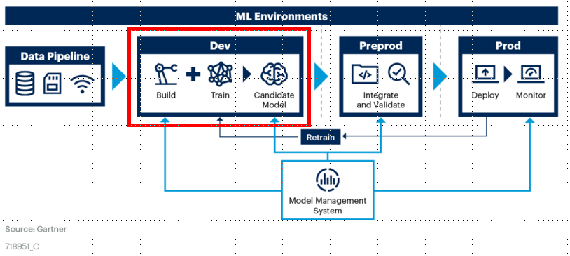

Сформируем матрицу X объект-признак и вектор y целевой переменной.

In [12]:
X = data.drop('churn', axis=1) # матрица объект-признак
y = data['churn'] # целевая переменная

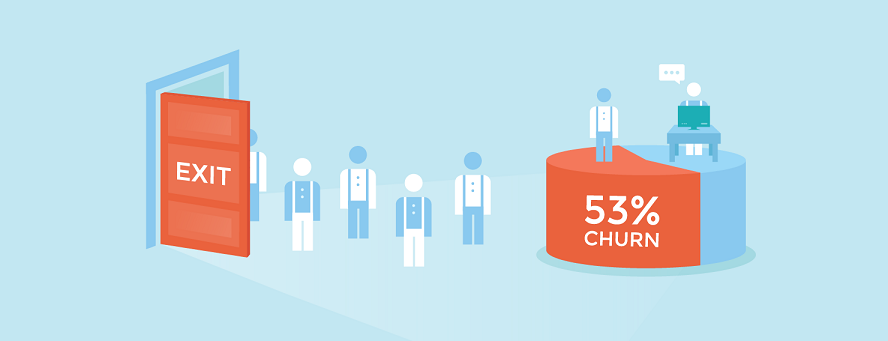

Разобъём данные на train и test (test — 25% от всех данных). Зачем это делается?

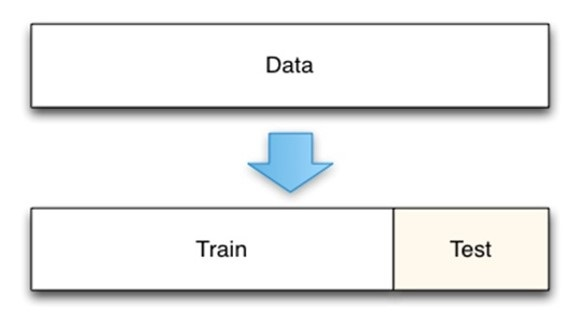

Мы разбиваем данные на train и test, чтобы:
* на тренировочных данных обучить модель
* на тестовых применить обученную модель и затем проверить качество модели

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

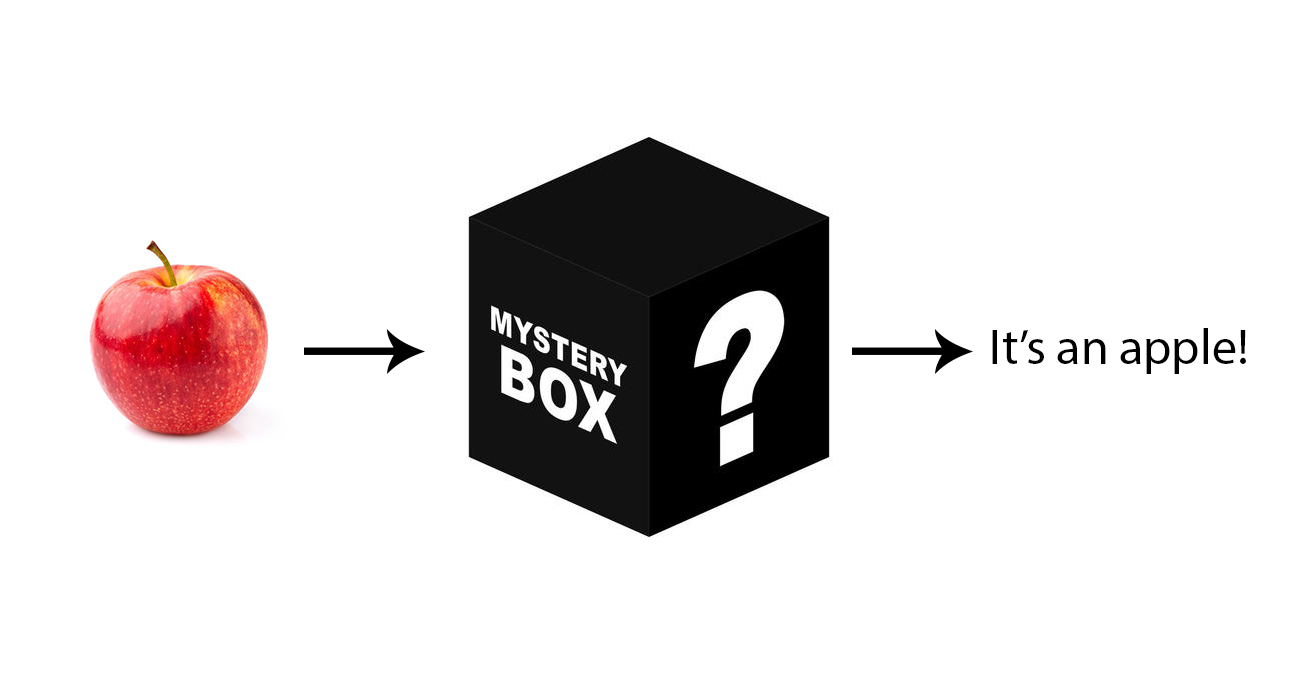

Есть много разных моделей машинного обучения. Мы будем пользоваться CatBoost — моделью градиентного бустинга от компании Яндекс, которая очень эффективно написана и широко используется в мире.

In [14]:
!pip install catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [15]:
from catboost import CatBoostClassifier

In [ ]:
cat_features = X.select_dtypes(include=["object"]).columns.to_list()

cat_features

In [ ]:
gbm = CatBoostClassifier(iterations=100,
                          depth=2,
                          learning_rate=0.1,
                          loss_function='Logloss',
                          eval_metric='AUC',
                          cat_features=cat_features,
                          verbose=False)
gbm.fit(Xtrain, ytrain)

In [19]:
pred_test = gbm.predict(Xtest) # предсказание классов

## <font color='green'>2.2. Оценка качества модели</font>

Посмотрим на предсказания модели и оценим ее качество.

In [ ]:
pred_test[:10]

In [ ]:
accuracy_score(ytest, pred_test)

In [ ]:
ytrain.value_counts()

Баланса классов нет: большинство клиентов не собирается менять оператора
 ($y=0$).

Также можно посмотреть на вероятности классов, выдаваемых моделью

In [ ]:
proba = gbm.predict_proba(Xtest)[:, 1]

proba[:10]

Оценим качество прогноза визуально, собрав в таблицу прогнозы и правильные ответы

In [ ]:
proba = gbm.predict_proba(Xtest)[:, 1]
pred = gbm.predict(Xtest)
ytrue = ytest

df = pd.DataFrame({
    "proba": proba,
    "pred": pred,
    "true": ytrue
})

df.sample(n=20)

In [ ]:
df_errors = df[df["pred"] != df["true"]]

df_errors

## <font color='green'>3. Интерпретация модели</font>

После обучения модели можно посмотреть на её веса, то есть на коэффициенты при признаках, найденные моделью.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = gbm.get_feature_importance()
feature_names = Xtrain.columns

fi_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(fi_df['feature'], fi_df['importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (CatBoost)")
plt.gca().invert_yaxis()  # чтобы важные признаки были сверху
plt.show()

Поздравляем! Наша первая модель построена!